# PCA Analysis of IRIS Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("data/IRIS.xlsx")

In [3]:
data.head()

,X1,X2,X3,X4,X5
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [4]:
data.columns = ["Species","sepal length","sepal width","petal length","petal width"]

In [5]:
data.head()

,Species,sepal length,sepal width,petal length,petal width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [39]:
data.groupby(by = ['Species']).mean()

,sepal length,sepal width,petal length,petal width
Species,,,,
1,5.006,3.428,1.462,0.246
2,5.936,2.770,4.260,1.326
3,6.588,2.974,5.552,2.026


In [31]:
data[data['Species'] == 2].describe()

,Species,sepal length,sepal width,petal length,petal width
count,50.0,50.000000,50.000000,50.000000,50.000000
mean,2.0,5.936000,2.770000,4.260000,1.326000
std,0.0,0.516171,0.313798,0.469911,0.197753
min,2.0,4.900000,2.000000,3.000000,1.000000
25%,2.0,5.600000,2.525000,4.000000,1.200000
50%,2.0,5.900000,2.800000,4.350000,1.300000
75%,2.0,6.300000,3.000000,4.600000,1.500000
max,2.0,7.000000,3.400000,5.100000,1.800000


In [32]:
data[data['Species'] == 3].describe()

,Species,sepal length,sepal width,petal length,petal width
count,50.0,50.00000,50.000000,50.000000,50.00000
mean,3.0,6.58800,2.974000,5.552000,2.02600
std,0.0,0.63588,0.322497,0.551895,0.27465
min,3.0,4.90000,2.200000,4.500000,1.40000
25%,3.0,6.22500,2.800000,5.100000,1.80000
50%,3.0,6.50000,3.000000,5.550000,2.00000
75%,3.0,6.90000,3.175000,5.875000,2.30000
max,3.0,7.90000,3.800000,6.900000,2.50000


## Taks 1

In [6]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [7]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
standard_scaler = StandardScaler()
X_normalized = pd.DataFrame(standard_scaler.fit_transform(X), columns = X.columns)
X_normalized.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [9]:
pca = PCA()
pca.fit(X_normalized)
eigenvalues = pca.explained_variance_
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

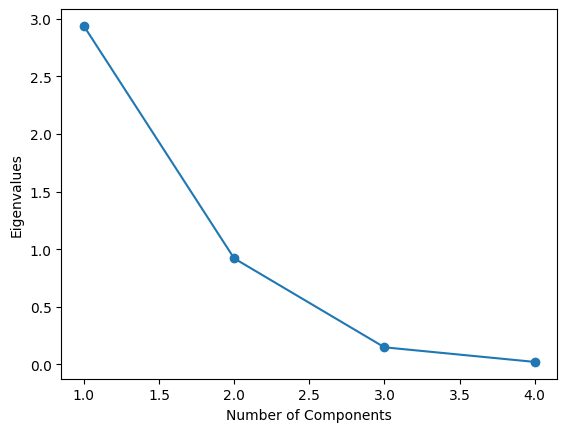

In [10]:
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, '-o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

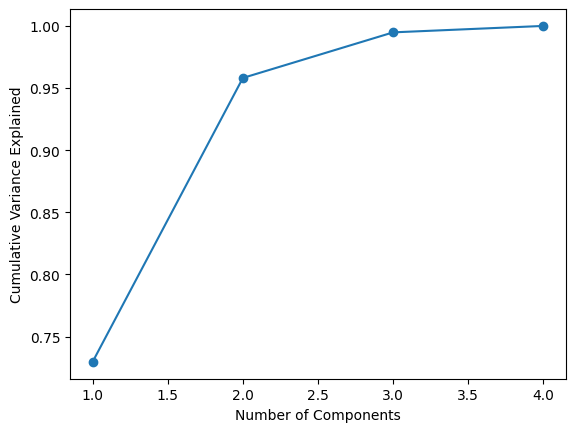

In [11]:
# Plot the cumulative variance explained as a function of the number of components
plt.plot(range(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [12]:
pca = PCA(n_components = 2)
pca.fit(X_normalized)

PCA(n_components=2)

In [13]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['Z1', 'Z2'], index = data.columns[1:])
loading_matrix

,Z1,Z2
sepal length,0.893151,0.362039
sepal width,-0.461684,0.885673
petal length,0.994877,0.023494
petal width,0.968212,0.064214


In [19]:
import seaborn as sn

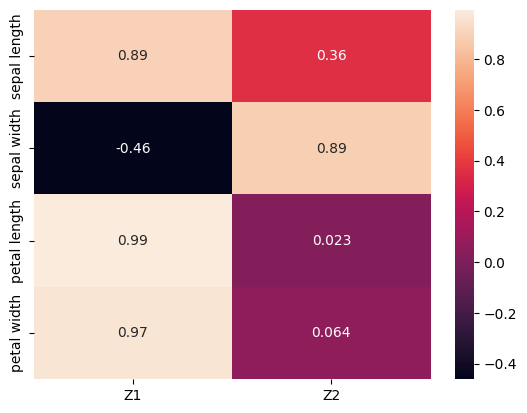

In [26]:
sn.heatmap(loading_matrix, annot = True)
plt.savefig("correlation_graph.png")
plt.show()

## Task 2

In [14]:
Z = pd.DataFrame(pca.transform(X_normalized), columns = ["Z1","Z2"])
Z.head()

,Z1,Z2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [15]:
# Separate the dataset into three subsets, one for each type of iris
setosa_pca =  Z[data['Species'] == 1]
versicolor_pca = Z[data['Species'] == 2]
virginica_pca = Z[data['Species'] == 3]

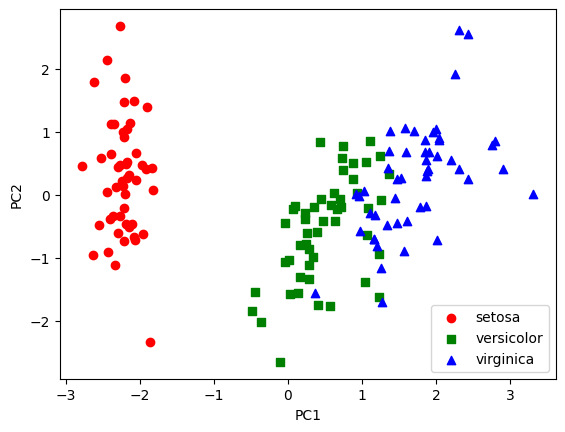

In [16]:
plt.scatter(setosa_pca.iloc[:,0], setosa_pca.iloc[:,1], c='red', marker='o', label='setosa')
plt.scatter(versicolor_pca.iloc[:,0], versicolor_pca.iloc[:,1], c='green', marker='s', label='versicolor')
plt.scatter(virginica_pca.iloc[:,0], virginica_pca.iloc[:,1], c='blue', marker='^', label='virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [17]:
# Calculate the average principal component scores for each type of iris
setosa_pca_avg = setosa_pca.mean(axis=0)
versicolor_pca_avg = versicolor_pca.mean(axis=0)
virginica_pca_avg = virginica_pca.mean(axis=0)

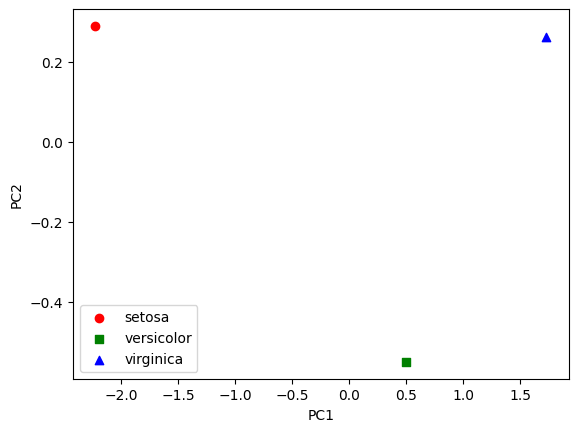

In [18]:
# Plot the average principal component scores for each type of iris
plt.scatter(setosa_pca_avg[0], setosa_pca_avg[1], c='red', marker='o', label='setosa')
plt.scatter(versicolor_pca_avg[0], versicolor_pca_avg[1], c='green', marker='s', label='versicolor')
plt.scatter(virginica_pca_avg[0], virginica_pca_avg[1], c='blue', marker='^', label='virginica')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()